<a href="https://colab.research.google.com/github/milu234/Project_Perseverance/blob/main/Dealing_with_non_linear_relationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DeepLearning/HousingData.csv')
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

In [3]:
df.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows

In [4]:
y = boston_data.target

In [5]:
# print(f"The value of y is {y}")

# **Brief Introduction to Decision tree**

Using Decision Tree Regressor

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
X = df[['LSTAT']].values

In [8]:
tree = DecisionTreeRegressor(max_depth=5)

In [9]:
tree.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [10]:
sort_idx = X.flatten().argsort()

Text(0, 0.5, 'MEDV')

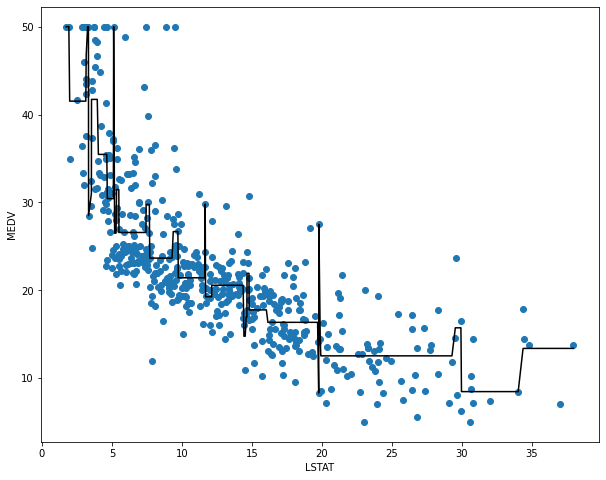

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx],tree.predict(X[sort_idx]),color='k')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [15]:
X = df.values


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=42, n_jobs=1)

In [19]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [20]:
y_train_pred = forest.predict(X_train)

In [21]:
y_test_pred = forest.predict(X_test)

In [22]:
mse_train = mean_squared_error(y_train , y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
print(f'MSE TRAIN : {mse_train}')
print(f'MSE TEST : {mse_test}')

MSE TRAIN : 1.8700342163841717
MSE TEST : 9.392062673421051


In [23]:
R_squared_train = r2_score(y_train , y_train_pred)
R_squared_test = r2_score(y_test,y_test_pred)
print(f'R-squared TRAIN : {R_squared_train}')
print(f'R-squared TEST : {R_squared_test}')

R-squared TRAIN : 0.9787245955118005
R-squared TEST : 0.8739542009113459


# **Brief Introduction to AdaBoost**

In [24]:
from sklearn.ensemble import AdaBoostRegressor

In [25]:
ada  = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=500, random_state=42)

In [26]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [27]:
y_train_pred = ada.predict(X_train)

In [28]:
y_test_pred = ada.predict(X_test)

In [29]:
mse_train = mean_squared_error(y_train , y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
print(f'MSE TRAIN : {mse_train}')
print(f'MSE TEST : {mse_test}')

MSE TRAIN : 4.660495418580552
MSE TEST : 13.494910482902208


In [30]:
R_squared_train = r2_score(y_train , y_train_pred)
R_squared_test = r2_score(y_test,y_test_pred)
print(f'R-squared TRAIN : {R_squared_train}')
print(f'R-squared TEST : {R_squared_test}')

R-squared TRAIN : 0.9469774807984944
R-squared TEST : 0.8188920970192286
